In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


# Q1

## (a)

In [4]:
def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  ## YOUR CODE STARTS HERE
  G = nx.DiGraph()
  G_book = G.to_undirected()
  for _, row in book_df.iterrows():
    G_book.add_edge(row['Source'], row['Target'], weight=row['weight'])
  return G_book

book1_G = make_graph(book1_df)
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)


## Print number of nodes and egdes
## YOUR CODE STARTS HERE

book_results = []
for i, book_graph in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G,]):
  n_edges_ = book_graph.number_of_edges()
  n_nodes_ =  book_graph.number_of_nodes()
  avg_degree_ = sum(dict(book_graph.degree()).values()) / n_nodes_


  book_results.append({
    'Book': i+1,
    'n_edges': n_edges_,
    'n_nodes': n_nodes_,
    'avg_degree' : avg_degree_
  })

pd.DataFrame(book_results)



,Book,n_edges,n_nodes,avg_degree
0,1,684,187,7.315508
1,2,775,259,5.984556
2,3,1008,303,6.653465
3,4,682,274,4.978102
4,5,760,317,4.794953


## (b)

In [5]:
allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

## YOUR CODE STARTS HERE

allbook_G = nx.Graph()
for _, row in allbook_df.iterrows():
  u, v, w = row['Source'], row['Target'], row['weight']
  if allbook_G.has_edge(u, v):
    allbook_G[u][v]['weight'] += w #Adding to existing weight
  else:
    allbook_G.add_edge(u, v, weight=w) #creating a new edge

#getting edges with the weights
edges_w_weights = [(u,v,allbook_G[u][v]['weight']) for u, v in allbook_G.edges()]
#sorting edges by weight
edges_sorted = sorted(edges_w_weights, key=lambda x: x[2], reverse=True)
#top 5 edges
top_5_edges = edges_sorted[:5]
#bottom 5 edges
bottom_5_edges = edges_sorted[-5:]

print("Top 5 Edges:", top_5_edges)
print("Bottom 5 Edges:", bottom_5_edges)


Top 5 Edges: [('Eddard-Stark', 'Robert-Baratheon', 334), ('Jon-Snow', 'Samwell-Tarly', 228), ('Joffrey-Baratheon', 'Sansa-Stark', 222), ('Tyrion-Lannister', 'Joffrey-Baratheon', 219), ('Tyrion-Lannister', 'Cersei-Lannister', 209)]
Bottom 5 Edges: [('Sour-Alyn', 'Yellow-Dick', 3), ('Dick-Straw', 'Hugh-Hungerford', 3), ('Holly', 'Rowan', 3), ('Gerrick-Kingsblood', 'Raymun-Redbeard', 3), ('Patrek-of-Kings-Mountain', 'Wun-Weg-Wun-Dar-Wun', 3)]


# Q2

## (a)

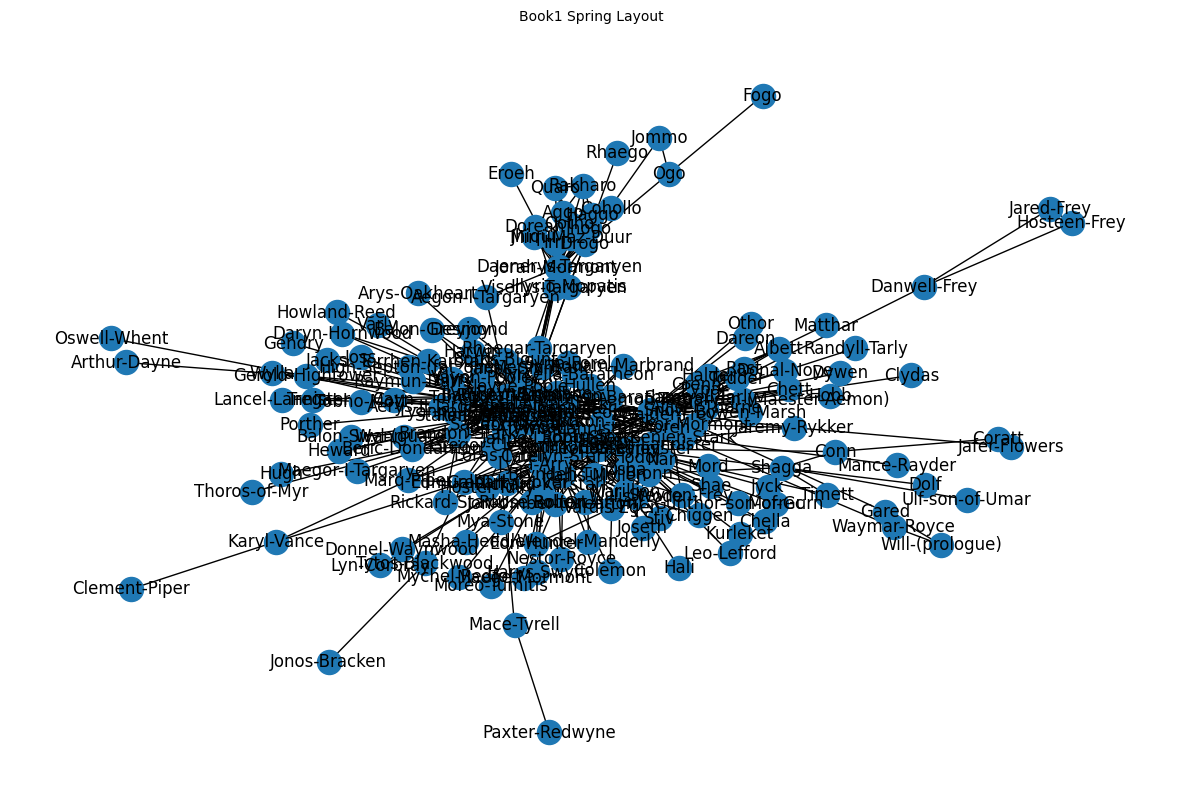

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)
## YOUR CODE STARTS HERE
# Generate the layout
pos = nx.spring_layout(book1_G, weight='weight', seed=42)  # Consider edge weights, set seed for reproducibility

# Draw the graph with node labels
nx.draw(book1_G, pos, with_labels=True, ax=ax)  # with_labels=True to reveal node labels
plt.show() # Display the plot


## (b)

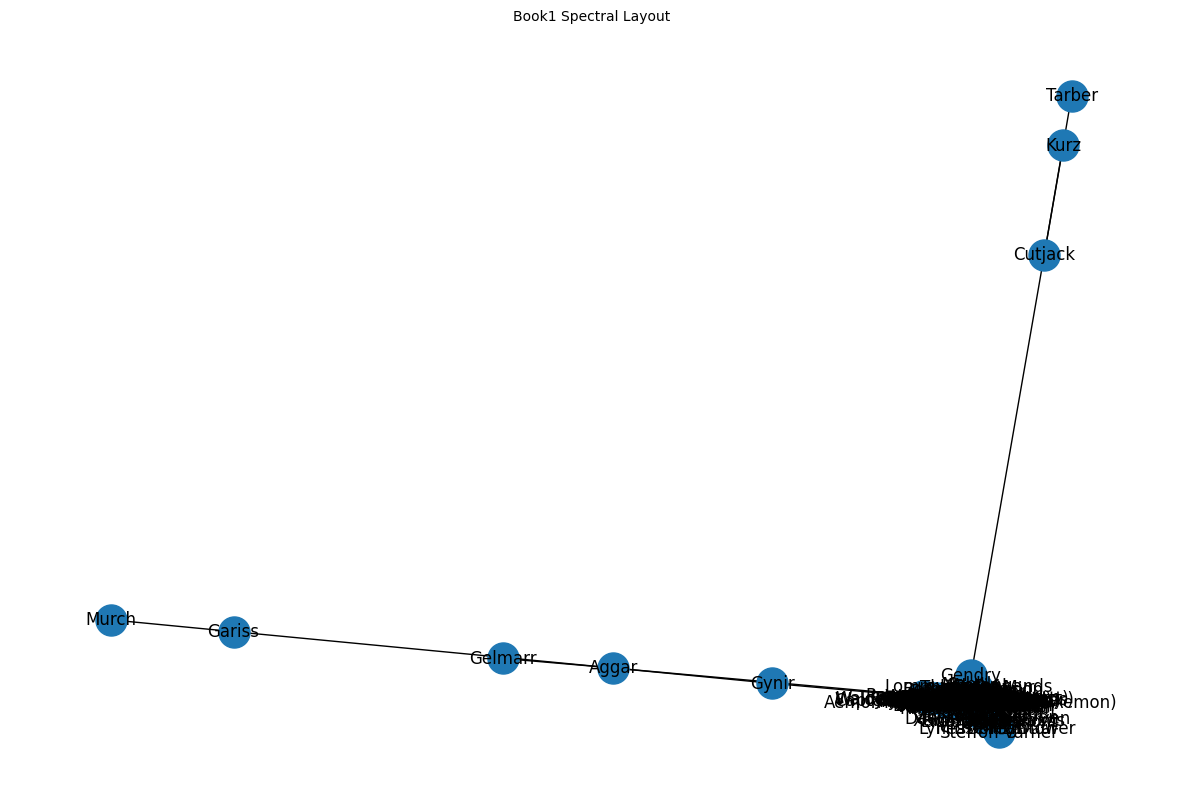

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)
## YOUR CODE STARTS HERE
# Generate the layout
nx.draw_spectral(book2_G, with_labels=True, node_size=500)


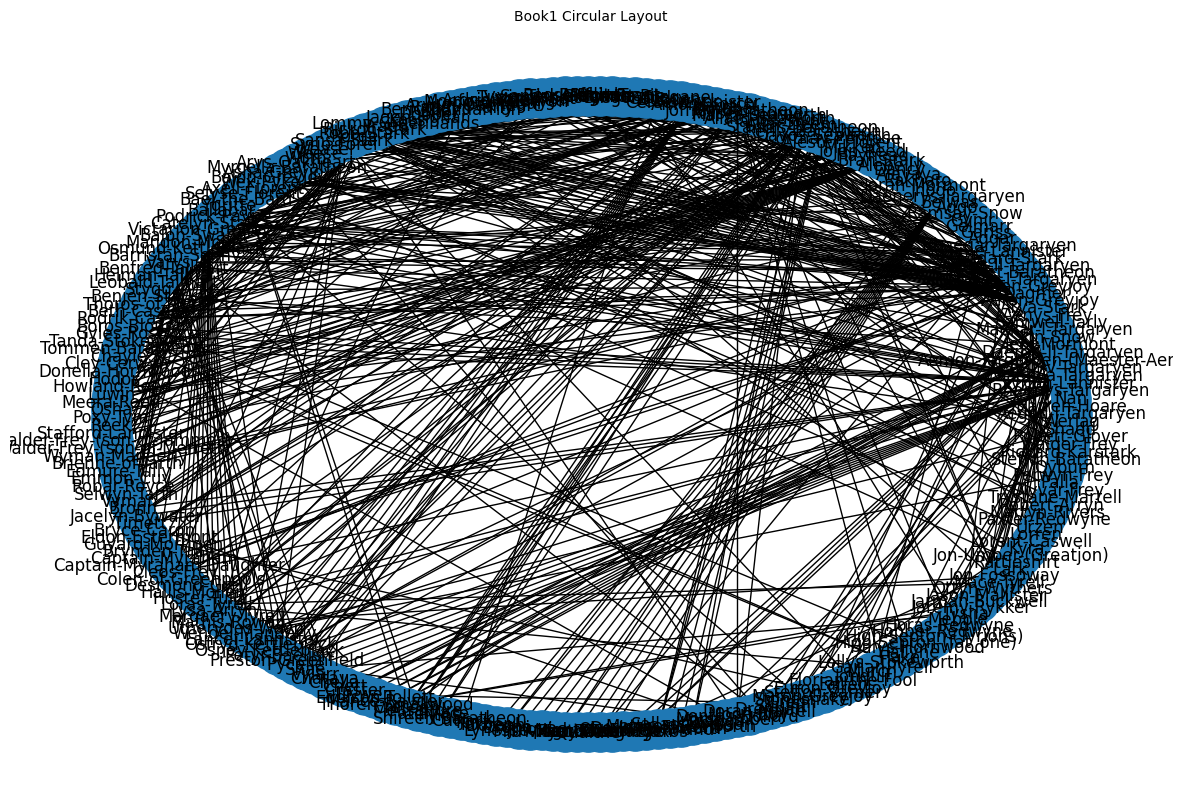

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)
## YOUR CODE STARTS HERE
nx.draw_circular(book2_G, with_labels=True, node_size=800)
plt.show()


# Q3

## (a)

In [26]:
## YOUR CODE STARTS HERE
pagerank_centrality = nx.pagerank(allbook_G)
nodes_sorted = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)
pagerank_top_5_nodes = nodes_sorted[:5]
pagerank_top_5_nodes


[('Jon-Snow', 0.03569376450045842),
 ('Tyrion-Lannister', 0.032849060015852354),
 ('Cersei-Lannister', 0.02360703859201849),
 ('Daenerys-Targaryen', 0.022306881987248024),
 ('Jaime-Lannister', 0.01975354961936214)]

## (b)

In [27]:
# Degree Centrality
## YOUR CODE STARTS HERE
degree_centrality = nx.degree_centrality(allbook_G)
nodes_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
degree_top_5_nodes = [node for node, _ in nodes_sorted[:5]]
pagerank_top_5_nodes = [node for node, _ in pagerank_top_5_nodes]
#print and calculate the overlap
overlap_nodes = [node for node in degree_top_5_nodes if node in pagerank_top_5_nodes]
print("Overlap Nodes:", overlap_nodes)

Overlap Nodes: ['Tyrion-Lannister', 'Jon-Snow', 'Jaime-Lannister', 'Cersei-Lannister']


In [28]:
# Closeness Centrality,
## YOUR CODE STARTS HERE
closeness_centrality = nx.closeness_centrality(allbook_G)
nodes_sorted = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
closeness_top_5_nodes =[node for node, _ in nodes_sorted[:5]]
#print and calculate the overlap
overlap_nodes = [node for node in closeness_top_5_nodes if node in pagerank_top_5_nodes]
print("Overlap Nodes:", overlap_nodes)

Overlap Nodes: ['Tyrion-Lannister', 'Cersei-Lannister', 'Jaime-Lannister']


In [29]:
# Betweenness Centrality
## YOUR CODE STARTS HERE
betweenneess_centrality = nx.betweenness_centrality(allbook_G)
nodes_sorted = sorted(betweenneess_centrality.items(), key=lambda x: x[1], reverse=True)
closeness_top_5_nodes = [node for node, _ in nodes_sorted[:5]]
#print and calculate the overlap
overlap_nodes = [node for node in closeness_top_5_nodes if node in pagerank_top_5_nodes]
print("Overlap Nodes:", overlap_nodes)

Overlap Nodes: ['Jon-Snow', 'Tyrion-Lannister', 'Daenerys-Targaryen']


**Enter Answer Here:** Degree Centrality and Page Rank Centrality has the largest overlap.

# Q4

## (a)

In [30]:
## YOUR CODE STARTS HERE
def get_top_pov_chars(book_graph):
  #calculate degree centrality
  degree_centrality = nx.degree_centrality(book_graph)
  #get top 8 characters after being sorted by degree centrality
  top_8 = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:8]
  return top_8

#top 8 pov characters for each book
top_8_book1 = get_top_pov_chars(book1_G)
top_8_book2 = get_top_pov_chars(book2_G)
top_8_book3 = get_top_pov_chars(book3_G)
top_8_book4 = get_top_pov_chars(book4_G)
top_8_book5 = get_top_pov_chars(book5_G)

#print the results
print("Top 8 POV Characters for Book 1:", top_8_book1)
print("Top 8 POV Characters for Book 2:", top_8_book2)
print("Top 8 POV Characters for Book 3:", top_8_book3)
print("Top 8 POV Characters for Book 4:", top_8_book4)
print("Top 8 POV Characters for Book 5:", top_8_book5)

Top 8 POV Characters for Book 1: ['Eddard-Stark', 'Robert-Baratheon', 'Tyrion-Lannister', 'Catelyn-Stark', 'Jon-Snow', 'Robb-Stark', 'Sansa-Stark', 'Bran-Stark']
Top 8 POV Characters for Book 2: ['Tyrion-Lannister', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Arya-Stark', 'Stannis-Baratheon', 'Robb-Stark', 'Catelyn-Stark', 'Theon-Greyjoy']
Top 8 POV Characters for Book 3: ['Tyrion-Lannister', 'Jon-Snow', 'Joffrey-Baratheon', 'Robb-Stark', 'Sansa-Stark', 'Jaime-Lannister', 'Catelyn-Stark', 'Cersei-Lannister']
Top 8 POV Characters for Book 4: ['Jaime-Lannister', 'Cersei-Lannister', 'Brienne-of-Tarth', 'Tyrion-Lannister', 'Margaery-Tyrell', 'Sansa-Stark', 'Tommen-Baratheon', 'Samwell-Tarly']
Top 8 POV Characters for Book 5: ['Jon-Snow', 'Daenerys-Targaryen', 'Stannis-Baratheon', 'Tyrion-Lannister', 'Theon-Greyjoy', 'Cersei-Lannister', 'Barristan-Selmy', 'Hizdahr-zo-Loraq']


## (b)

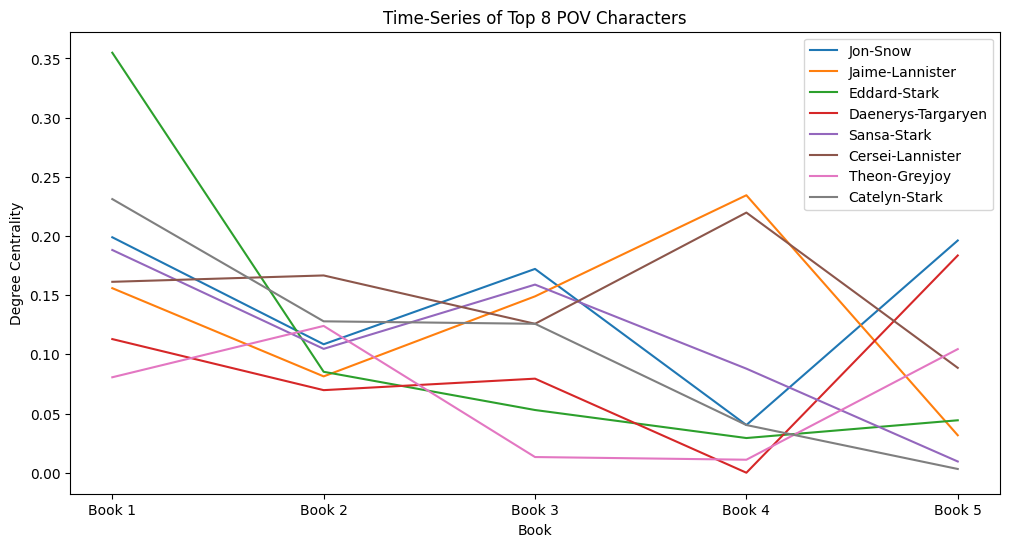

In [33]:
## YOUR CODE STARTS HERE
def centrality_timeseries(book_graphs):
  #create a dataframe to store centrality values across the books
  centrality_values = pd.DataFrame()

  for i, book_graph in enumerate(book_graphs):
    degree_centrality = nx.degree_centrality(book_graph)
    #pandas series
    centrality_series = pd.Series(degree_centrality)
    #adding a book number as a column
    centrality_series.name = f'Book {i+1}'
    #merge with the existing DataFrame
    centrality_values = pd.concat([centrality_values, centrality_series], axis=1)

  #filling in missing values
  centrality_values = centrality_values.fillna(0)
  #absolute centrality between books
  centrality_changes = centrality_values.diff(axis=1).abs()
  #sum of absolute changes
  centrality_changes['Total Change'] = centrality_changes.sum(axis=1)
  #top 8 characters with total change in centrality
  top_8_chars = centrality_changes['Total Change'].nlargest(8).index

  return centrality_values, centrality_changes, top_8_chars

#list of book graphs
book_graphs = [book1_G, book2_G, book3_G, book4_G, book5_G]
centrality_values, centrality_changes, top_8_chars = centrality_timeseries(book_graphs)

#plot time-series for top 8 characters
plt.figure(figsize=(12, 6))
for char in top_8_chars:
  plt.plot(centrality_values.columns, centrality_values.loc[char], label=char)
plt.title('Time-Series of Top 8 POV Characters')
plt.xlabel('Book')
plt.ylabel('Degree Centrality')
plt.legend()
plt.show()
